In [1]:
# Import libraries
import pandas as pd
import numpy as np
import time
import random
import queue
import datetime
from queue import Queue
from collections import deque

In [2]:
# define variables for the dataset
arrival_time = []
run_time = []
memory_usage = []
cpu_usage = []

# define the number of data points in the dataset
num_data_points = 10

data = []

# generate random values for the dataset
for i in range(num_data_points):
  datapoint = {
    'arrival_time': random.randint(1, 100),
    'run_time': random.randint(1, 10),
    'memory_usage': random.randint(1, 100),
    'cpu_usage': random.randint(1, 100),
    'execution_time': None,
    'energy_consumption': None,
    'cost': None
  }
  data.append(datapoint)

In [3]:
# print the resulting list of dictionaries
print(data)

[{'arrival_time': 82, 'run_time': 6, 'memory_usage': 84, 'cpu_usage': 99, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 13, 'run_time': 6, 'memory_usage': 20, 'cpu_usage': 56, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 69, 'run_time': 5, 'memory_usage': 68, 'cpu_usage': 81, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 56, 'run_time': 7, 'memory_usage': 80, 'cpu_usage': 50, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 95, 'run_time': 1, 'memory_usage': 42, 'cpu_usage': 59, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 87, 'run_time': 9, 'memory_usage': 57, 'cpu_usage': 74, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 78, 'run_time': 3, 'memory_usage': 84, 'cpu_usage': 6, 'execution_time': None, 'energy_consumption': None, 'cost': None}, {'arrival_time': 30,

In [4]:
# Create a dataframe from the data list
df = pd.DataFrame(data)

# Print the dataframe to the screen
print(df)

   arrival_time  run_time  memory_usage  cpu_usage execution_time  \
0            82         6            84         99           None   
1            13         6            20         56           None   
2            69         5            68         81           None   
3            56         7            80         50           None   
4            95         1            42         59           None   
5            87         9            57         74           None   
6            78         3            84          6           None   
7            30         5            83         72           None   
8            99         6            17         50           None   
9            68         1            12         41           None   

  energy_consumption  cost  
0               None  None  
1               None  None  
2               None  None  
3               None  None  
4               None  None  
5               None  None  
6               None  None  
7       

In [5]:
# sort the dataset by arrival time
data.sort(key=lambda x: x['arrival_time'])

In [6]:
# Create a dataframe from the data list
df = pd.DataFrame(data)

# Print the dataframe to the screen
print(df)

   arrival_time  run_time  memory_usage  cpu_usage execution_time  \
0            13         6            20         56           None   
1            30         5            83         72           None   
2            56         7            80         50           None   
3            68         1            12         41           None   
4            69         5            68         81           None   
5            78         3            84          6           None   
6            82         6            84         99           None   
7            87         9            57         74           None   
8            95         1            42         59           None   
9            99         6            17         50           None   

  energy_consumption  cost  
0               None  None  
1               None  None  
2               None  None  
3               None  None  
4               None  None  
5               None  None  
6               None  None  
7       

In [7]:
#function to print the available resources of each fog node
def print_resources(fog_nodes, nodes_resources):
    for node in fog_nodes:
        resources = nodes_resources[node]
        print("Available resources in {} after execution: CPU = {}, Memory = {}".format(node, nodes_resources[node]["cpu"], nodes_resources[node]["memory"]))

def process_task(task, node, nodes_resources):
    start_time = datetime.datetime.now()
    print("Processing task:", task)
    print("Assigned to node: {}".format(node))
    #while (datetime.datetime.now() - start_time).total_seconds() < 5:
    time.sleep(task['run_time'])
    end_time = datetime.datetime.now()
    task['execution_time'] = end_time - start_time
    task['energy_consumption'] = calculate_energy_consumption(task)
    task['cost'] = calculate_cost(task)
    print("Execution time: {}".format(task['execution_time']))
    print("Energy consumption: {}".format(task['energy_consumption']))
    print("Cost: {}".format(task['cost']))


def calculate_energy_consumption(task):
    # calculate energy consumption based on CPU usage and memory usage
    energy_consumption = task['cpu_usage'] * 0.1 + task['memory_usage'] * 0.05
    return energy_consumption

def calculate_cost(task):
    # calculate cost based on energy consumption, execution time, and other factors
    cost = task['energy_consumption'] * 0.1 + task['execution_time'].total_seconds() * 0.05
    return cost
    
def release_resources(task, node, nodes_resources):
    nodes_resources[node]["cpu"] += task['cpu_usage']
    nodes_resources[node ]["memory"] += task['memory_usage']
  
fog_nodes = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5']

# initialize total variables
total_execution_time = datetime.timedelta(seconds=0)
total_energy_consumption = 0
total_cost = 0

In [8]:
# function to apply load balancing using the round robin algorithm
def round_robin_load_balancing(data, fog_nodes):
    # dictionary to store the data points assigned to each fog node
    nodes_data = {node: [] for node in fog_nodes}
    # dictionary to store the available usage of each fog node
    nodes_resources = {
        "Node1": {'cpu': 100, 'memory': 100},
        "Node2": {'cpu': 100, 'memory': 100},
        "Node3": {'cpu': 100, 'memory': 100},
        "Node4": {'cpu': 100, 'memory': 100},
        "Node5": {'cpu': 100, 'memory': 100}
    }
   
    # create a queue to store the tasks
    task_queue = deque(data)
    # initialize the node variable
    node = None

    # continuously process tasks in the queue using the round robin algorithm
    while task_queue:
        # get the next task in the queue using the round robin algorithm
        task = task_queue.popleft()

        # assign the task to the next fog node in the list using the round robin algorithm
        node = fog_nodes[len(nodes_data[node]) % len(fog_nodes)] if node else fog_nodes[0]
        print("Task assigned:", task)

        # check if there are enough available resources to process the task
        if task['cpu_usage'] <= nodes_resources[node]["cpu"] and task['memory_usage'] <= nodes_resources[node]["memory"]:
            print("Available resources in {} before processing task: CPU = {}, Memory = {}".format(node, nodes_resources[node]["cpu"], nodes_resources[node]["memory"]))

            process_task(task, node, nodes_resources)
            
            # subtract the resources used by the task from the available resources
            nodes_resources[node]["cpu"] -= task['cpu_usage']
            nodes_resources[node]["memory"] -= task['memory_usage']
            print("Resources used by task during execution: CPU = {}, Memory = {}".format(task['cpu_usage'], task['memory_usage']))
            release_resources(task, node, nodes_resources)

            #print the available resources of each fog node
            print_resources(fog_nodes, nodes_resources)
            print()

            # assign the task to the fog node
            nodes_data[node].append(task)

        else:
            # not enough resources are available, put the task back in the queue
            task_queue.append(task)
            
    return nodes_data, nodes_resources
    
#load balance the data using round robin algorithm
nodes_data, nodes_resources = round_robin_load_balancing(data, fog_nodes)

#print the data points assigned to each fog node
for node, node_data in nodes_data.items():
    print("Data points assigned to {}:".format(node))
    print(node_data)
    print()

# calculate and print total execution time, cost, and energy consumption
for task in data:
    total_execution_time += task['execution_time']
    total_energy_consumption += task['energy_consumption']
    total_cost += task['cost']

print("Total execution time: {}".format(total_execution_time))
print("Total energy consumption: {}".format(total_energy_consumption))
print("Total cost: {}".format(total_cost))

Task assigned: {'arrival_time': 13, 'run_time': 6, 'memory_usage': 20, 'cpu_usage': 56, 'execution_time': None, 'energy_consumption': None, 'cost': None}
Available resources in Node1 before processing task: CPU = 100, Memory = 100
Processing task: {'arrival_time': 13, 'run_time': 6, 'memory_usage': 20, 'cpu_usage': 56, 'execution_time': None, 'energy_consumption': None, 'cost': None}
Assigned to node: Node1
Execution time: 0:00:06.004693
Energy consumption: 6.6000000000000005
Cost: 0.9602346500000001
Resources used by task during execution: CPU = 56, Memory = 20
Available resources in Node1 after execution: CPU = 100, Memory = 100
Available resources in Node2 after execution: CPU = 100, Memory = 100
Available resources in Node3 after execution: CPU = 100, Memory = 100
Available resources in Node4 after execution: CPU = 100, Memory = 100
Available resources in Node5 after execution: CPU = 100, Memory = 100

Task assigned: {'arrival_time': 30, 'run_time': 5, 'memory_usage': 83, 'cpu_usag

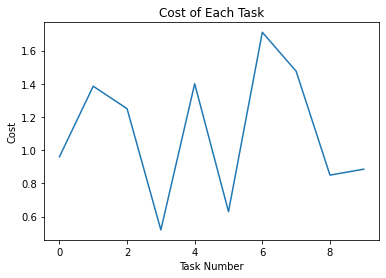

In [9]:
import matplotlib.pyplot as plt

# extract the cost of each task from the data
costs = [task['cost'] for task in data]

# plot the line graph
plt.plot(costs)

# add a title and labels for the x and y axes
plt.title("Cost of Each Task")
plt.xlabel("Task Number")
plt.ylabel("Cost")

# show the plot
plt.show()

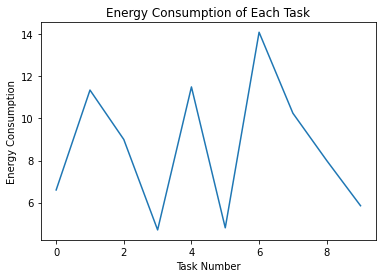

In [17]:
# extract the cost of each task from the data
energy = [task['energy_consumption'] for task in data]

# plot the line graph
plt.plot(energy)

# add a title and labels for the x and y axes
plt.title("Energy Consumption of Each Task")
plt.xlabel("Task Number")
plt.ylabel("Energy Consumption")

# show the plot
plt.show()